<center><img src='img/ms_logo.jpeg' height=40% width=40%></center>

<center><h1>Data Visualization and Plotting</h1></center>

Data by itself is useless; without any context, we have no way to understand it.  With different data science techniques, we can extract information from the data, and use this to drive decision making.

The main way we've investigated data so far is with descriptive statistics.  Today, we're going to add data visualization to our toolbox, and see a real example of where descriptive statistics without accompanying visualization can be misleading.  

Let's start by importing the first data set we'll be working with, and investigating it with some descriptive statistics.  

The data set is a CSV, and can be found in the datasets subdirectory.  

**Use pandas to read this data set into a dataframe below.  Call .describe() on the dataset to print the summary statistics.**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
np.random.seed(1547)

In [6]:
ls

00_Test_Installation.ipynb       README.md
01_Descriptive_Statistics.ipynb  datasets/
02__Data_Visualization.ipynb     img/
Installation_Instructions.md


In [7]:
#Read in AQ_Data.csv as a dataframe.
df = pd.read_csv('datasets/AQ_Data.csv')
# Call .describe() on the dataframe. 
df.describe()

,Unnamed: 0,x1,x2,x3,x4,y1,y2,y3,y4
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,6.000000,9.000000,9.000000,9.000000,9.000000,7.500909,7.500909,7.500000,7.500909
std,3.316625,3.316625,3.316625,3.316625,3.316625,2.031568,2.031657,2.030424,2.030579
min,1.000000,4.000000,4.000000,4.000000,8.000000,4.260000,3.100000,5.390000,5.250000
25%,3.500000,6.500000,6.500000,6.500000,8.000000,6.315000,6.695000,6.250000,6.170000
50%,6.000000,9.000000,9.000000,9.000000,8.000000,7.580000,8.140000,7.110000,7.040000
75%,8.500000,11.500000,11.500000,11.500000,8.000000,8.570000,8.950000,7.980000,8.190000
max,11.000000,14.000000,14.000000,14.000000,19.000000,10.840000,9.260000,12.740000,12.500000


There are 4 different data subsets of data contained within this csv file.  The x and y cooridates for each point is denoted by the number following it--the points for the first data set are (x1, y1), (x2, y2) for the second data set, etc. 

The summary statistics suggest that these datasets are all almost exactly the same!  The mean and standard deviation of the points in each data set are essentially identical.  There are several other identical statistics:

1.  The line of best fit for each data set is y = 3.0 + 0.5x
1.  For each data set, the correlation between x and y values are 0.816
1.  For each data set, the coefficient of determination is 0.67

Looking purely at the summary statistics, the evidence is pretty clear.  These data sets are basically identical.  Let's graph them and confirm this suspicion. Run the cell below to plot each data set side-by-side.  

NameError: name 'pd' is not defined

mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82


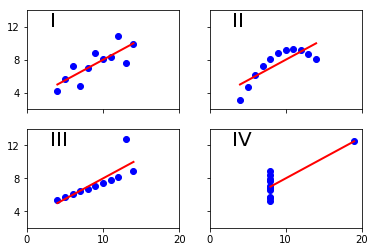

In [8]:
# Run this cell--you do not need to write any code!

x = df['x1']
y1 = df['y1']
y2 = df['y2']
y3 = df['y3']
x4 = df['x4']
y4 = df['y4']

def fit(x):
    return 3 + 0.5 * x

xfit = np.array([np.min(x), np.max(x)])

plt.subplot(221)
plt.plot(x, y1, 'bo', xfit, fit(xfit), 'r-', lw=2)
plt.axis([2, 20, 2, 14])
plt.setp(plt.gca(), xticklabels=[], yticks=(4, 8, 12), xticks=(0, 10, 20))
plt.text(3, 12, 'I', fontsize=20)

plt.subplot(222)
plt.plot(x, y2, 'bo', xfit, fit(xfit), 'r-', lw=2)
plt.axis([2, 20, 2, 14])
plt.setp(plt.gca(), xticks=(0, 10, 20), xticklabels=[],
         yticks=(4, 8, 12), yticklabels=[], )
plt.text(3, 12, 'II', fontsize=20)

plt.subplot(223)
plt.plot(x, y3, 'bo', xfit, fit(xfit), 'r-', lw=2)
plt.axis([2, 20, 2, 14])
plt.text(3, 12, 'III', fontsize=20)
plt.setp(plt.gca(), yticks=(4, 8, 12), xticks=(0, 10, 20))

plt.subplot(224)
xfit = np.array([np.min(x4), np.max(x4)])
plt.plot(x4, y4, 'bo', xfit, fit(xfit), 'r-', lw=2)
plt.axis([2, 20, 2, 14])
plt.setp(plt.gca(), yticklabels=[], yticks=(4, 8, 12), xticks=(0, 10, 20))
plt.text(3, 12, 'IV', fontsize=20)

# verify the stats
pairs = (x, y1), (x, y2), (x, y3), (x4, y4)
for x, y in pairs:
    print('mean=%1.2f, std=%1.2f, r=%1.2f' % (np.mean(y), np.std(y),
          np.corrcoef(x, y)[0][1]))

plt.show()

# Code pulled from Matplotlib's tutorial on Anscombe's Quartet:
# https://matplotlib.org/gallery/specialty_plots/anscombe.html

<center><h2>WAIT, WHAT?</h2></center>
<br>
<br>
<center><img src='http://www.reactiongifs.com/r/2013/11/betty-faint.gif'></center>

Our summary statistics could not have been more wrong! When we graph these data sets, can see that they are qualititatively very, very different:

1. Plot 1 is linear
1. Plot 2 is non-linear.
1. Plot 3 is mostly linear, with an outlier skewing the line of best fit.  
1. Plot 4 has little relationship at all--all coordinates but 1 have the exact same X value, regardless of y value!

## Anscombe's Quartet

The misleading similarities of these data sets are no accident. These data sets are the famous [Anscombe's Quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet) (well, famous to statisticians and data scientists, anyway).  This data set was designed by the statistician Francis Anscombe in 1973 to illustrate how misleading summary statistics can be without an accompanying visualization.  Although the numbers tell us the data sets are the same, our eyes can easily see this is not the case.  

This brings us to the main lesson Anscombe has so elegantly taught us: **use visualizations whenever possible!**.  
<br>
<br>

<center><h1>Visualizing Data with Matplotlib</h1></center>

For the second part of this lesson, we'll explore the different visualizations available in python's most popular data visualization library, [Matplotlib](https://matplotlib.org/index.html).  

Matplotlib is a tried-and-true python framework that is one of the first tools data scientists reach for when working with a data set.  Data visualization is a crucial part of the data science process, whether we're doing our initial exploration to get a feel for our data in the beginning of a project, or communicating the results of our experiment to stakeholders in a clear, intuitive way.  

### Which graph should I Use?

Before we can visualize our data, we'll need to select the type of graph we'll want to use.  There are three main types of graphs we can use:

1.  Histograms/bar charts
1.  Scatterplots
1.  Time Series

These types of graphs are the most common (and most useful!) ways to visualize data. Luckily, pandas and matplotlib are designed to fit together effortlessly.  Let's code up some examples of each chart!


# Histograms/Bar Charts

Histograms are used to represent counts.  If the data you're trying to represent is categorical, or have repeated values across a dimension of your data set, then a histogram is the way to go.  

Visualizing histograms is such a common task in pandas that they've actually built it right into the pandas library, eliminating extra code that would normally be needed to use matplotlib.  Every dataframe in pandas has access to the `.hist()` method, which will visualize the data in a histogram.  

It's common to mix up bar charts and histograms.  We're going to build one of each to help exemplify the differences, and examine the best use case for each.  

**TASK: Use the df.hist( ) method to create a histogram for the sample data (provided below)**


,blue,fish,one,red,two
0,1,4,1,1,1


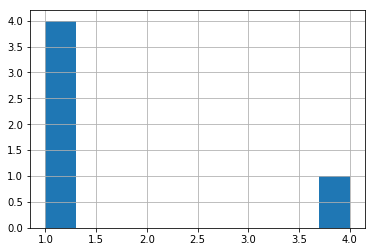

In [9]:
sample_data = {
    'one': [1],
    'two': [1],
    'fish': [4],
    'red': [1],
    'blue': [1]
}

# Create a dataframe by calling pd.Dataframe() and passing the sample_data dictionary as the first argument.
hist_df = pd.DataFrame(sample_data)

# To create the histogram, we'll have to specify that we're calling it on the first (and only) row of data in 
# the dataframe.  To do this, we use .iloc[0].  We can chain the hist() method onto the iloc[0] method.
#  
# Call .iloc[0].hist() on the hist_df object.  
hist_df.iloc[0].hist()
hist_df

If this looks different than you were expecting, it's because you were thinking of a bar chart instead.  Histograms show us the number of times a value shows up.  In this case, 'one', 'two', 'red', and 'blue' all have values of 1, while only 'fish' has a value of 4.  The histogram has binned these examples to show us the total number of times each number shows up in the data set.  In this context, the graph above makes sense--the '1' column is at 4, and the '4' column is at 1.  

A **Bar Chart** shows us separate values for different categories, side-by-side.  Let's create a bar chart of the same data and see how it looks.  

**TASK: Create a bar chart using the .plot.bar() method on a new dataframe.**

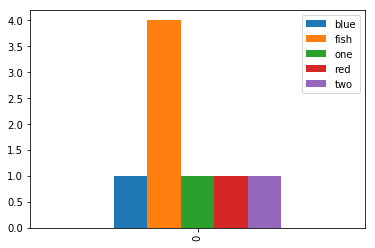

In [10]:
# Create another dataframe called bar_df using pd.Dataframe. Pass in sample_data as the argument (this is already 
# in memory from the last cell ran, so you do NOT need to copy and paste sample data into this cell.)

bar_df = pd.DataFrame(sample_data)

# To create the chart, access the plot object stored in the dataframe's .plot attribute, and call this object's .bar() 
# method.  This can be chained together as .plot.bar()
bar_df.plot.bar()

This looks more like what we expected! The chart color-codes each word differently for us, and even provides a nice key in the top-right corner for us. 

**TASK:  In your own words, how would you explain when you should use a histogram, versus when you should use a bar chart?**

ANSWER:

{WRITE ANSWER HERE!}


<center><h2>Scatterplots</h2></center>

Scatterplots are one of the simplest, but most effective visualizations out there! The idea behind a scatterplot is intuitive--make one column of the dataframe your x coordinate, make another one your y coordinate, and then plot everything to see how it looks.  

Scatterplots are also easy to build use pandas/matplotlib.  

**TASK: Create a scatterplot using the sample data provided below.**

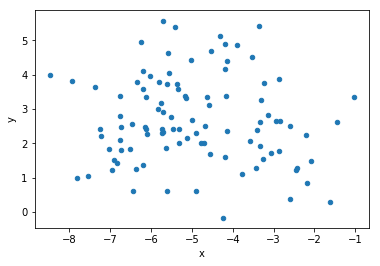

In [11]:
# We'll use the make_blobs function from Scikit-Learn to generate dummy data with a few clusters in it.  
from sklearn.datasets import make_blobs
X, _ = make_blobs()
scatter_df = pd.DataFrame(X, columns=['x', 'y'])


# To create the scatter plot, access the object stored in .plot, and then call the .scatter() method. You can
# chain these together, as you did with the bar chart example.  In the .scatter() method, you'll need to pass in 'x'
# and 'y' as positional arguments to tell the scatter plot which points belong on each axis.  
scatter_df.plot.scatter(x='x', y='y')

That was easy!  The scatterplot is a great way to get a quick, intuitive feel for our data set.  In this case, we can see that there are three clusters in our data.  In a real data science project, this is the type of thing that would likely warrant more investigation.  If we didn't visualize our data as a scatterplot, we might never have noticed this!


<center><h2>Line Graphs/Time Series</h2></center>

Line Graphs are most commonly used for Time Series analysis--that is, tracking how data changes over a time interval. A Time Series is a just a line graph where the x-axis is a sequence of datetimes, starting at the left and progressing as you move to the right.  Line graphs are just like a scatterplot, but with a continuous line drawn between the points, starting at the leftmost x value and connecting to each sequential x value.  

Line graphs and Time Series plots are one the most important tools used in the financial world.  For our example chart, we're going to graph the price of the Ethereum cryptocurrency.  (If you're not familiar with ethereum, its a very popular cryptocurrency similar to bitcoin.  It's primarily used for HODLing, until it can traded for a lamborghinis on the moon).  

<center><img src='https://i.redd.it/3zrf0i340iez.gif' height=25% width=25%></center>

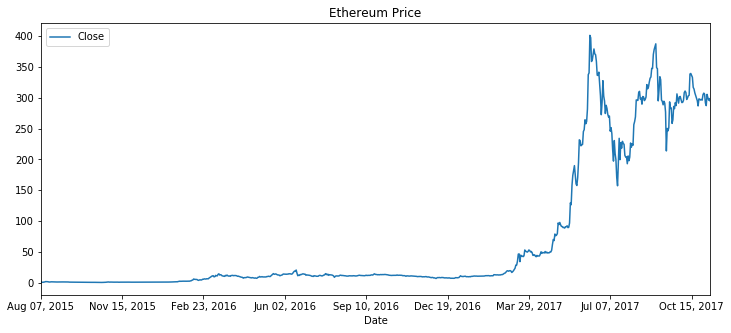

In [12]:
# This 
eth_df = pd.read_csv('datasets/ethereum_price_data.csv')
eth_df = eth_df.iloc[::-1]

# call the .plot method on eth_df.  Be sure to pass in the "Date" column name (as a string) for the x keyword, 
# and the "Close" column name (also a string) for the y keyword.  Give the graph a label with the title with the 
# title keyword, and pass in a in the tuple (12,5) for the figsize keyword (this will set the size of the graph)
eth_df.plot(x="Date", y="Close", title="Ethereum Price", figsize=(12,5))

That was pretty easy to do, and the graph is very easy to understand.  Note that we had to add a few keyword arguments to make the graph large enough to read without the X-axis items overlapping.  It's easy to adjust the looks of any plot with keyword arguments--after all, `Dataframe.plot` is just a wrapper around `matplotlib.pyplot`.  For a full list of keywords you can use to modify your plot, check out the [documentation!](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html#pandas.DataFrame.plot)

<center><h1>Challenge Section</h1></center>

For the remainder of this lesson, you'll be using the Titanic data set to create several visualizations that communicate something interesting.  For instance, can you visualize survival rates of men vs. women?  How about by age? Fare price? 

To complete this section, you'll need to:

1.  Think of at least 3 interesting questions to investigate in the data set.  
1.  Select the most appropriate graph type to represent the data relevant to each question.  
1.  Create a visualization that attempts to answer the questions you have posed!

**TASK: Create at least 3 visualizations related to the Titanic data set.**

In [16]:
# Read in titanic.csv, which is contained within the datasets folder.

titanic_df = pd.read_csv("datasets/titanic.csv")

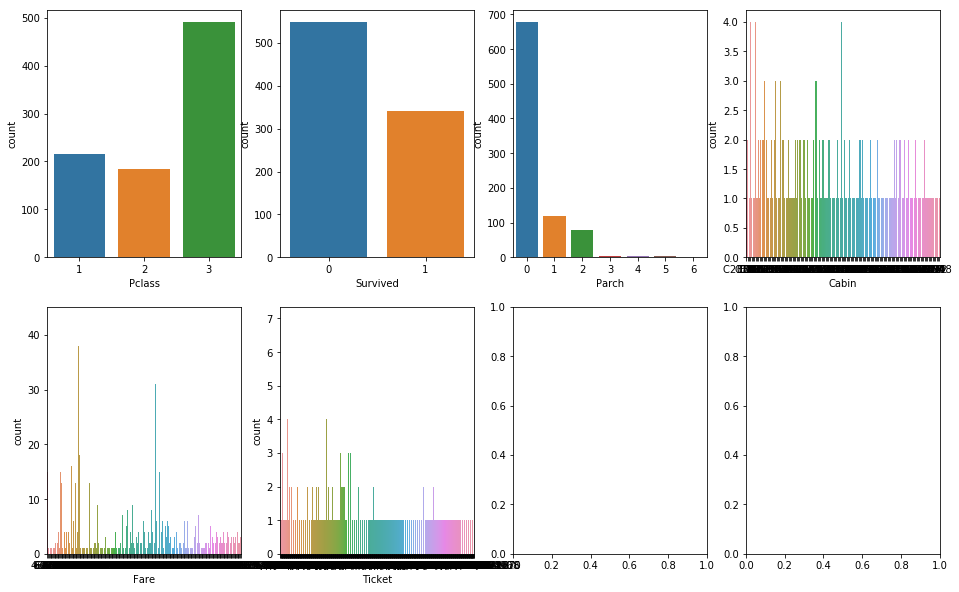

In [14]:
figs, axes = plt.subplots(2, 4, figsize=(16, 10), sharex=False, sharey=False)
sns.countplot(x='Pclass', data=titanic_df, ax=axes[0,0])
sns.countplot(x='Survived', data=titanic_df, ax=axes[0,1])
sns.countplot(x='Parch', data=titanic_df, ax=axes[0,2])
sns.countplot(x='Cabin', data=titanic_df, ax=axes[0,3])
sns.countplot(x='Fare', data=titanic_df, ax=axes[1,0])
sns.countplot(x='Ticket', data=titanic_df, ax=axes[1,1])


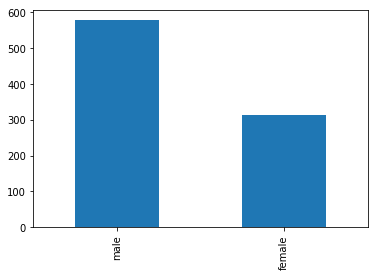

In [20]:
titanic_df.Sex.value_counts().plot.bar()

In [21]:
titanic_df[titanic_df.Sex.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [23]:
titanic_df.Fare.value_counts()

8.0500      43
13.0000     42
7.8958      38
7.7500      34
26.0000     31
10.5000     24
7.9250      18
7.7750      16
26.5500     15
0.0000      15
7.2292      15
7.8542      13
8.6625      13
7.2500      13
7.2250      12
16.1000      9
9.5000       9
24.1500      8
15.5000      8
56.4958      7
52.0000      7
14.5000      7
14.4542      7
69.5500      7
7.0500       7
31.2750      7
46.9000      6
30.0000      6
7.7958       6
39.6875      6
            ..
7.1417       1
42.4000      1
211.5000     1
12.2750      1
61.1750      1
8.4333       1
51.4792      1
7.8875       1
8.6833       1
7.5208       1
34.6542      1
28.7125      1
25.5875      1
7.7292       1
12.2875      1
8.6542       1
8.7125       1
61.3792      1
6.9500       1
9.8417       1
8.3000       1
13.7917      1
9.4750       1
13.4167      1
26.3875      1
8.4583       1
9.8375       1
8.3625       1
14.1083      1
17.4000      1
Name: Fare, Length: 248, dtype: int64

In [25]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


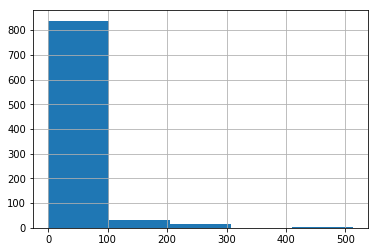

In [27]:
titanic_df.Fare.hist(bins=5)

In [33]:
titanic_df[titanic_df.Fare==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


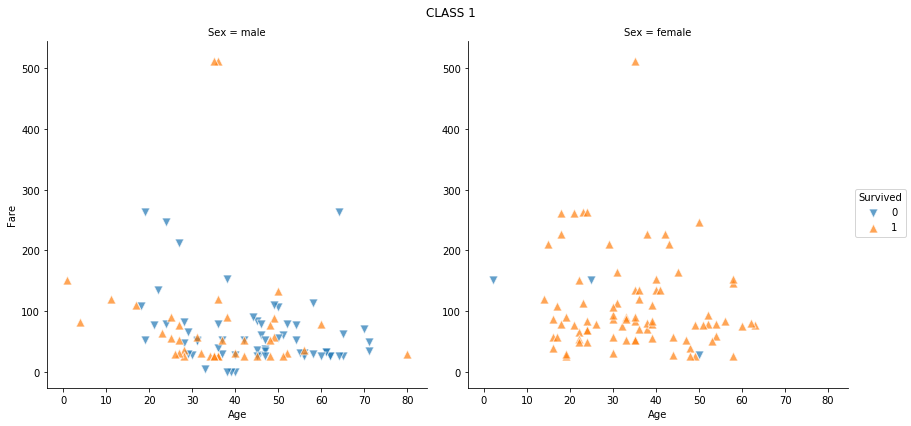

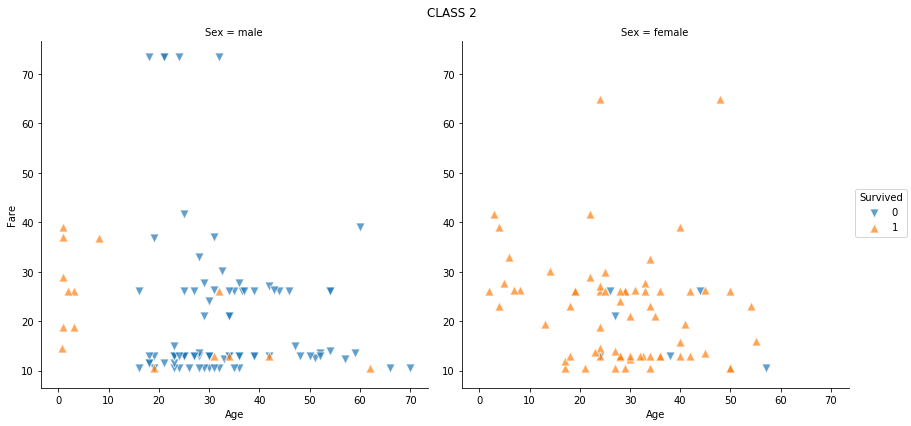

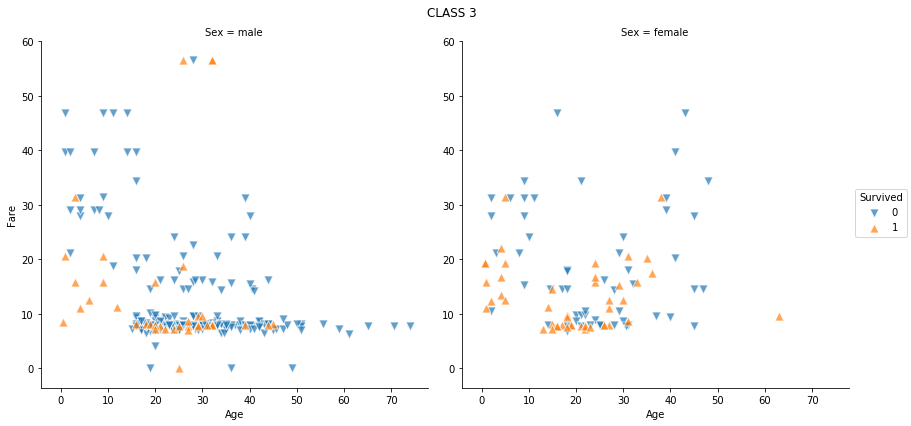

In [39]:
#distribution of passangers by age and fare, grouped by sex and class and survival info.
def scatter_plot_class(pclass):
    g = sns.FacetGrid(titanic_df[titanic_df['Pclass'] == pclass],
                     col='Sex',
                     col_order=['male','female'],
                     hue='Survived',
                     hue_kws=dict(marker=['v','^']),
                     size=6)
    g = (g.map(plt.scatter, 'Age', 'Fare', edgecolor='w', alpha=0.7, s=80).add_legend())
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle('CLASS {}'.format(pclass))
    
scatter_plot_class(1)
scatter_plot_class(2)
scatter_plot_class(3)

In [42]:
survived_by_class = titanic_df.groupby('Pclass')['Survived'].mean()
survived_by_class

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [43]:
survived_by_sex = titanic_df.groupby('Sex')['Survived'].mean()
survived_by_sex

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [50]:
survived_by_age = titanic_df.groupby('Age')['Survived'].mean()
survived_by_age

Age
0.42     1.000000
0.67     1.000000
0.75     1.000000
0.83     1.000000
0.92     1.000000
1.00     0.714286
2.00     0.300000
3.00     0.833333
4.00     0.700000
5.00     1.000000
6.00     0.666667
7.00     0.333333
8.00     0.500000
9.00     0.250000
10.00    0.000000
11.00    0.250000
12.00    1.000000
13.00    1.000000
14.00    0.500000
14.50    0.000000
15.00    0.800000
16.00    0.352941
17.00    0.461538
18.00    0.346154
19.00    0.360000
20.00    0.200000
20.50    0.000000
21.00    0.208333
22.00    0.407407
23.00    0.333333
           ...   
44.00    0.333333
45.00    0.416667
45.50    0.000000
46.00    0.000000
47.00    0.111111
48.00    0.666667
49.00    0.666667
50.00    0.500000
51.00    0.285714
52.00    0.500000
53.00    1.000000
54.00    0.375000
55.00    0.500000
55.50    0.000000
56.00    0.500000
57.00    0.000000
58.00    0.600000
59.00    0.000000
60.00    0.500000
61.00    0.000000
62.00    0.500000
63.00    1.000000
64.00    0.000000
65.00    0.000000
66.00 

(0.0, 1.0)

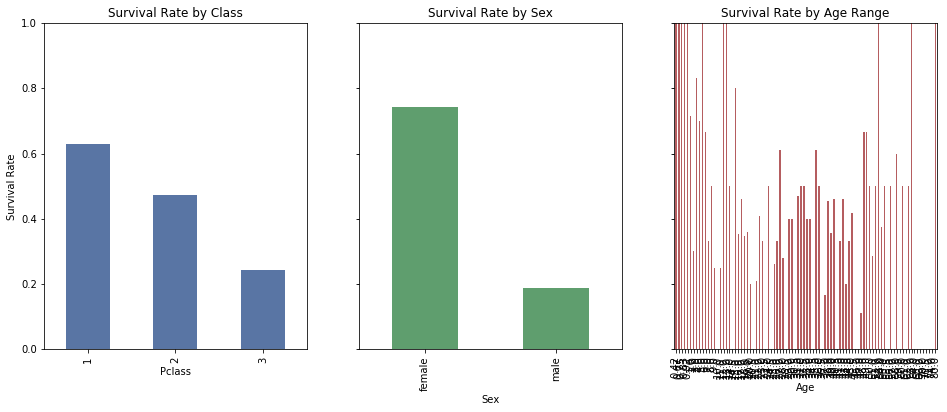

In [47]:
fig, (axis1,axis2,axis3) = plt.subplots(1, 3, figsize=(16,6))

ax = survived_by_class.plot.bar(ax=axis1, color='#5975A4', title='Survival Rate by Class', sharey=True)
ax.set_ylabel('Survival Rate')
ax.set_ylim(0.0,1.0)
ax = survived_by_sex.plot.bar(ax=axis2, color='#5F9E6E', title='Survival Rate by Sex', sharey=True)
ax.set_ylim(0.0,1.0)
ax = survived_by_age.plot.bar(ax=axis3, color='#B55D60', title='Survival Rate by Age Range', sharey=True)
ax.set_ylim(0.0,1.0)

In [52]:
grouped_data = pd.concat(
    [titanic_df.groupby(['Pclass', 'Sex', 'Age'])['Survived'].mean(),
    titanic_df.groupby(['Pclass', 'Sex', 'Age'])['Survived'].count()],
    axis=1)
grouped_data.colums = ['Survived', 'Count']
grouped_data

Survived  Survived
Pclass Sex    Age                     
1      female 2.0   0.000000         1
              14.0  1.000000         1
              15.0  1.000000         1
              16.0  1.000000         3
              17.0  1.000000         2
              18.0  1.000000         3
              19.0  1.000000         3
              21.0  1.000000         2
              22.0  1.000000         4
              23.0  1.000000         2
              24.0  1.000000         5
              25.0  0.000000         1
              26.0  1.000000         1
              29.0  1.000000         1
              30.0  1.000000         5
              31.0  1.000000         2
              32.0  1.000000         1
              33.0  1.000000         3
              35.0  1.000000         6
              36.0  1.000000         3
              38.0  1.000000         3
              39.0  1.000000         4
              40.0  1.000000         2
              41.0  1.000000         1
              42.0  1.000000         1
              43.0  1.000000         1
              44.0  1.000000         2
              45.0  1.000000         1
              47.0  1.000000         1
              48.0  1.000000         2
...                      ...       ...
3      male   30.5  0.000000         1
              31.0  0.333333         3
              32.0  0.454545        11
              33.0  0.000000         7
              34.0  0.000000         4
              34.5  0.000000         1
              35.0  0.000000         5
              36.0  0.000000         5
              37.0  0.000000         1
              38.0  0.000000         3
              39.0  0.250000         4
              40.0  0.000000         4
              40.5  0.000000         2
              41.0  0.000000         2
              42.0  0.000000         4
              43.0  0.000000         2
              44.0  0.250000         4
              45.0  0.500000         2
              45.5  0.000000         1
              47.0  0.000000         2
              48.0  0.000000         1
              49.0  0.000000         1
              50.0  0.000000         1
              51.0  0.000000         3
              55.5  0.000000         1
              59.0  0.000000         1
              61.0  0.000000         1
              65.0  0.000000         1
              70.5  0.000000         1
              74.0  0.000000         1

[283 rows x 2 columns]

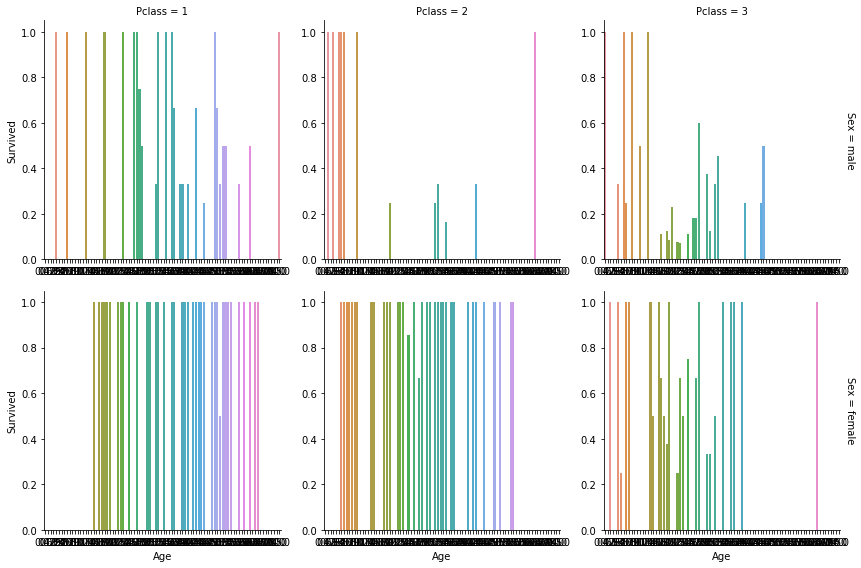

In [54]:
 g = sns.factorplot(
     x='Age',
     y='Survived',
     col='Pclass',
     row='Sex',
     data=titanic_df,
     margin_titles=True,
     kind='bar',
     ci=None)

In [55]:
fare_by_class_sex = titanic_df.groupby(['Pclass', 'Sex'])['Fare'].mean()
fare_by_class_sex

Pclass  Sex   
1       female    106.125798
        male       67.226127
2       female     21.970121
        male       19.741782
3       female     16.118810
        male       12.661633
Name: Fare, dtype: float64

Text(0,0.5,'Avarage Fare')

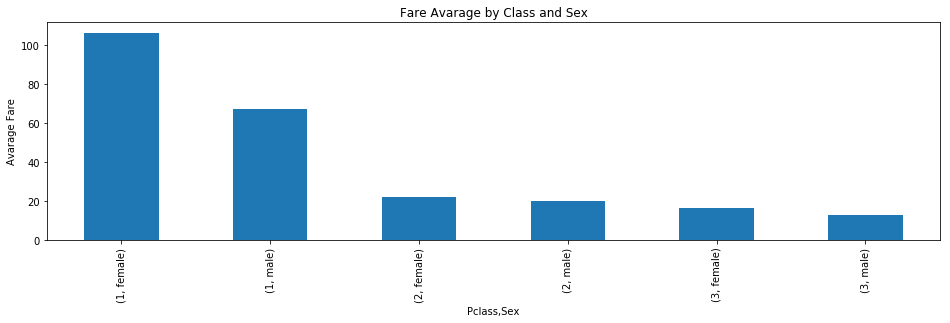

In [56]:
ax = fare_by_class_sex.plot.bar(figsize=(16,4), title='Fare Avarage by Class and Sex')
ax.set_ylabel('Avarage Fare')

In [57]:
embarked = titanic_df.groupby('Embarked').mean()
embarked['Count'] = titanic_df['Embarked'].value_counts()
embarked

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Count
Embarked,,,,,,,,
C,445.357143,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144,168
Q,417.896104,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030,77
S,449.527950,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812,644


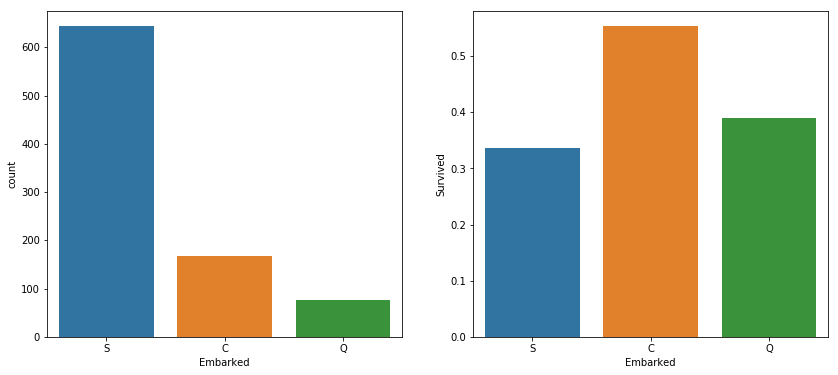

In [58]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(14,6))

sns.countplot(x='Embarked', data=titanic_df, order=['S', 'C', 'Q'], ax=axis1)
sns.barplot(x=embarked.index, y='Survived', data=embarked, order=['S','C','Q'], ax=axis2)

In [69]:
survived_by_class = titanic_df.groupby('Pclass')['Survived'].mean()
survived_by_class

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [65]:
sibligns_survived = titanic_df.groupby('Sex')['SibSp'].mean()
sibligns_survived

Sex
female    0.694268
male      0.429809
Name: SibSp, dtype: float64

In [68]:
age_survival = titanic_df.groupby('Age')['Survived'].mean()
age_survival

Age
0.42     1.000000
0.67     1.000000
0.75     1.000000
0.83     1.000000
0.92     1.000000
1.00     0.714286
2.00     0.300000
3.00     0.833333
4.00     0.700000
5.00     1.000000
6.00     0.666667
7.00     0.333333
8.00     0.500000
9.00     0.250000
10.00    0.000000
11.00    0.250000
12.00    1.000000
13.00    1.000000
14.00    0.500000
14.50    0.000000
15.00    0.800000
16.00    0.352941
17.00    0.461538
18.00    0.346154
19.00    0.360000
20.00    0.200000
20.50    0.000000
21.00    0.208333
22.00    0.407407
23.00    0.333333
           ...   
44.00    0.333333
45.00    0.416667
45.50    0.000000
46.00    0.000000
47.00    0.111111
48.00    0.666667
49.00    0.666667
50.00    0.500000
51.00    0.285714
52.00    0.500000
53.00    1.000000
54.00    0.375000
55.00    0.500000
55.50    0.000000
56.00    0.500000
57.00    0.000000
58.00    0.600000
59.00    0.000000
60.00    0.500000
61.00    0.000000
62.00    0.500000
63.00    1.000000
64.00    0.000000
65.00    0.000000
66.00 

(0.0, 1.0)

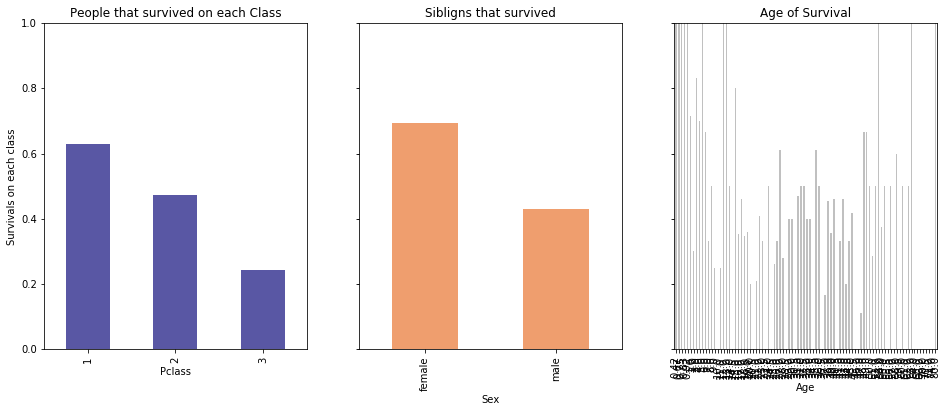

In [76]:
fix, (axis1,axis2,axis3) = plt.subplots(1, 3, figsize=(16,6))

ax = survived_by_class.plot.bar(ax=axis1, color='#5957A4', title='People that survived on each Class', sharey=True)
ax.set_ylabel('Survivals on each class')
ax.set_ylim(0.0,1.0)
ax = sibligns_survived.plot.bar(ax=axis2, color='#EF9E6E', title='Sibligns that survived', sharey=True)
ax.set_ylim(0.0,1.0)
ax = age_survival.plot.bar(ax=axis3, color='#C0C0C0', title='Age of Survival', sharey=True)
ax.set_ylim(0.0,1.0)